# Project 4 - Unstructured Text Analysis
---

- Your Name Here: Niklas Baldis
- WFU Email Address: baldnj23@wfu.edu
- Submission Date: 8/13/23

# Instructions

1. Download the notebook `job_descriptions_and_resume.ipynb` and the dataset `MSBA20JobDescriptions.xlsx` from the course website.

2. Open the notebook on your local computer; Or upload and open it in Google Colab.

3. Replace the placeholder text above with your name, email address, and submission date.

4. Be sure to display your results.

5. Please submit your notebook in **HTML** and your writeup in a **Word doc**

## Load libraries

Load the following libraries, you may need to install them first!
- Data Manipulation: `pandas`, `numpy`
- Data Visualization：`seaborn`, `matplotlib.pyplot`
- Text libraries:
```python
import nltk
from nltk.util import ngrams
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from textblob import TextBlob
from wordcloud import WordCloud
```
- Other: `warnings` (ignore warning messages)

In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.util import ngrams
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
import string
from textblob import TextBlob
from wordcloud import WordCloud

# --------------------------------
import warnings
warnings.filterwarnings('ignore')
# --------------------------------
!pip install spacy
import spacy
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2023-08-14 01:39:10.608411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [532]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Task 0 - Gather Jobs

1. Create the jobs dataframe `df_jobs` by using `pd.read_excel()` to read in your `My20MSBAJobDescriptions.xlsx` (after you’ve loaded it with jobs of your choice)

> You can get started by using the `MSBA20JobDescription.xlsx` file if you want.

2. I recommend cleaning up the column names using:
```python
df_jobs.columns = (df_jobs.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '')
)
```

3. Print the first 5 jobs to make sure your import works.

In [533]:
df_jobs = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projects/Project 5/MSBA20JobDescriptions.xlsx')
df_jobs.head()

,Title,Firm,Job Description
0,"Data Analyst, Fantasy & Betting",PGA Tour,"The Data Analyst, Fantasy & Betting will be a ..."
1,"Analyst, Hockey Analytics",New Jersey Devils,POSITION OVERVIEW:\nThe Analyst – Hockey Analy...
2,Junior Quanititative Analyst,Los Angeles Dodgers,The Los Angeles Dodgers are looking for quanti...
3,Performance Science Analyst,Houston Astros,Summary/Objective\nThe Houston Astros are curr...
4,Data Scientist,Milwaukee Brewers,Overview\nAs part of the Business Analytics te...


In [534]:
df_jobs.columns = (df_jobs.columns
 .str.strip()
 .str.lower()
 .str.replace(' ', '_')
 .str.replace('-', '_')
 .str.replace('(', '')
 .str.replace(')', '')
 .str.replace('?', '')
 .str.replace('\'', '')
)
df_jobs.head()

,title,firm,job_description
0,"Data Analyst, Fantasy & Betting",PGA Tour,"The Data Analyst, Fantasy & Betting will be a ..."
1,"Analyst, Hockey Analytics",New Jersey Devils,POSITION OVERVIEW:\nThe Analyst – Hockey Analy...
2,Junior Quanititative Analyst,Los Angeles Dodgers,The Los Angeles Dodgers are looking for quanti...
3,Performance Science Analyst,Houston Astros,Summary/Objective\nThe Houston Astros are curr...
4,Data Scientist,Milwaukee Brewers,Overview\nAs part of the Business Analytics te...


## Task 1 - Job Description Term & Bigram Frequency Analysis

1.Create a table of term frequencies

The following steps will help you make your `term_frequency` table need to make your first wordcloud.
- make a list called `exclude_words`:
>
```python
# This is just an exmaple:
exclude_words = ["key", "clients", "chicago"]
```
- download and create another list of stopwords
>
```python
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
```

- pick your column of job description from `df_jobs`, implement the following:
  - change its text into lower cases
  - remove leading and trailing spaces
  - do string encodings using `.normalize('NFKD')`
  - make a list of text than create rows of words using `.explode()`
  - remove punctuation
  - remove digits (if needed)
  - name it as a new data frame `"term_df"` with a single column `"term"`

- pick your data frame `term_df`, implement the following steps:
  - remove words from your lists of `exclude_words` and `stop_words`
  - remove any words you think make sense
  - groupby("term") and summarize or simply use size()
  - sort terms by their frequency in descending order
  - create the `term_frequency` table
  - finally, print out the the top 20 terms

 > Hint:  A good reference is [here](https://colab.research.google.com/drive/1DdK_2Pn-LRSNnUhfuyBLEZlWvoFbffM_?usp=sharing).

In [535]:
#Make a list of exclude words
exclude_words = ['Overview','Summary','Description', 'Qualifications', 'Responsibilities','·', '','','●']
exclude_words

['Overview',
 'Summary',
 'Description',
 'Qualifications',
 'Responsibilities',
 '·',
 '',
 '\uf0b7',
 '●']

In [536]:
#Make a list of stop words
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [537]:
#Df_jobs implementations
  #change its text into lower cases
  #remove leading and trailing spaces
  #do string encodings using .normalize('NFKD')
  #make a list of text than create rows of words using .explode()
  #remove punctuation
  #remove digits (if needed)
  #name it as a new data frame "term_df" with a single column "term"

term_df = (df_jobs['job_description']
             .str.lower()
             .str.strip() # remove leading and trailing spaces
             .str.normalize('NFKD') # string encodings
             .str.split() # make a list of text
             .explode() # create rows of words
             .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .reset_index(drop=True)
             .to_frame('term')
          )
# term_df.head(10)


term_freq_w_junk = (term_df
            .groupby("term")
            .size()
            .reset_index()
            .rename(columns={0: "freq"})
            .sort_values("freq", ascending=False)
            .dropna()
            .reset_index(drop=True)
            )
term_freq_w_junk

#term_df['term'] = df_jobs['job_description'].str.lower().str.strip().str.normalize('NFKD').explode().str.replace(f"[{string.punctuation}]", "")
#term_df['term']=

,term,freq
0,and,291
1,to,153
2,the,145
3,of,113
4,in,97
...,...,...
1225,haves,1
1226,here,1
1227,high,1
1228,highest,1


In [538]:
#Df_terms implementations
junk = exclude_words + stop_words
is_junk = term_freq_w_junk['term'].isin(junk)
term_freq_w_junk[~is_junk]

,term,freq
5,data,96
9,experience,56
14,work,31
15,team,28
18,science,24
...,...,...
1223,growing,1
1224,growthminded,1
1225,haves,1
1227,high,1


In [539]:
term_freq_wo_junk=term_freq_w_junk[~is_junk]
term_freq_wo_junk

,term,freq
5,data,96
9,experience,56
14,work,31
15,team,28
18,science,24
...,...,...
1223,growing,1
1224,growthminded,1
1225,haves,1
1227,high,1


2. Create a wordcloud with all of the terms, using WordCloud()

In [540]:
#From 4.7 Visualize with Junk Section
term_freq_wo_junk_dict=dict(zip(term_freq_wo_junk['term'], term_freq_wo_junk['freq']))
#term_freq_wo_junk_dict

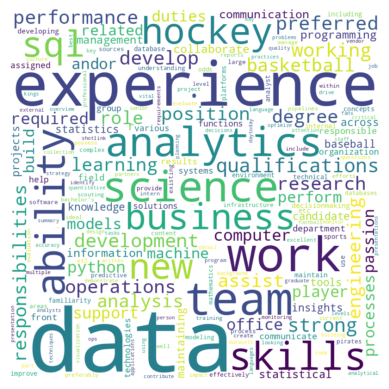

In [541]:
#From 4.7 Visualize with Junk Section
wordcloud_all = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(term_freq_wo_junk_dict)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.show()

3. Create a wordcloud for the terms that start with the letter "a"
> Hint: Filter the data using something like this
```python
term_frequency['term'].str.startswith('a')
```

In [542]:
term_start_a_filter = term_freq_wo_junk['term'].str.startswith('a')
term_start_a_filter

5       False
9       False
14      False
15      False
18      False
        ...  
1223    False
1224    False
1225    False
1227    False
1228    False
Name: term, Length: 1158, dtype: bool

In [543]:
term_start_a= term_freq_wo_junk[term_start_a_filter]
term_start_a

,term,freq
20,analytics,22
21,ability,22
42,assist,14
48,analysis,13
62,andor,11
...,...,...
984,automate,1
985,automated,1
986,autonomously,1
987,available,1


In [544]:
#From 4.7 Visualize with Junk Section
term_start_a_dict = dict(zip(term_start_a['term'], term_start_a['freq']))
#term_start_a_dict

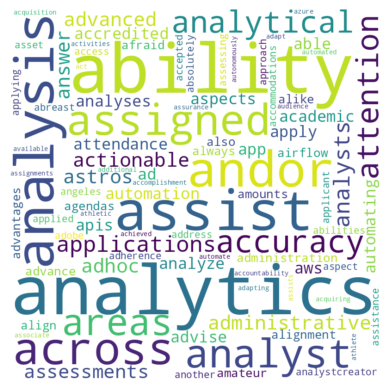

In [545]:
#From 4.7 Visualize with Junk Section
wordcloud_start_a = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(term_start_a_dict)
plt.imshow(wordcloud_start_a, interpolation='bilinear')
plt.axis('off')
plt.show()

4. Create a word cloud of companies

#Adapted From 5.7 Name Entity Recognition

In [546]:
nlp = spacy.load('en_core_web_sm')

In [547]:
term_freq_list = term_freq_wo_junk['term'].to_list()
#term_freq_list

In [548]:
named_entities = []
for text in term_freq_list:
    doc = nlp(text)
    for ent in doc.ents:
        named_entities.append((ent.text, ent.label_))
entity_df = pd.DataFrame(named_entities, columns=['entity', 'entity_type'])
entity_df.head()

,entity,entity_type
0,sql,ORG
1,desire,PERSON
2,sacramento,GPE
3,microsoft,ORG
4,hours,TIME


In [549]:
#org_filter = entity_df.query("entity_type == 'ORG'")
#org_filter

In [550]:
org_freq = (entity_df
        .query("entity_type == 'ORG'")
        .groupby("entity")
        .agg(freq=("entity_type", "count"))
        .reset_index()
)
org_freq

,entity,freq
0,columbus,1
1,digital,1
2,ftp,1
3,gcp,1
4,git,1
5,microsoft,1
6,nashville,1
7,nba,1
8,sql,1
9,sse,1


In [551]:
org_dict = dict(zip(org_freq['entity'], org_freq['freq']))
#org_dict

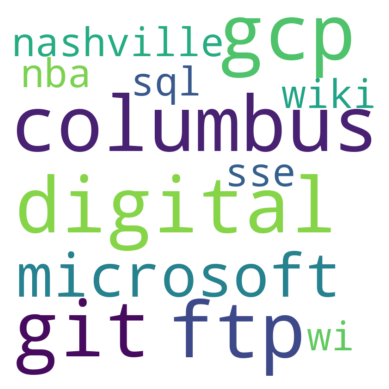

In [552]:
wordcloud_org = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(org_dict)
plt.imshow(wordcloud_org, interpolation='bilinear')
plt.axis('off')
plt.show()

5. Create a word cloud of job titles.

In [553]:
#df_jobs['freq'] = df_jobs.sum()
#df_jobs['freq']

In [554]:
#From 5.7 Name Entity Recognition Word Clouds Section
job_freq= (df_jobs
            .groupby("title")
            .size()
            .reset_index()
            .rename(columns={0: "freq"})
            .sort_values("freq", ascending=False)
            .dropna()
            .reset_index(drop=True)
            )
job_freq

,title,freq
0,Data Scientist,2
1,"Analyst Intern, Data Science and Solutions",1
2,Junior Data Engineer,1
3,"Software Engineer Intern, Data Science And Sol...",1
4,Project Specialist,1
5,Performance Science Analyst,1
6,Part-Time Data Scientist Assistant,1
7,Operations Associate,1
8,Junior Quanititative Analyst,1
9,Hockey Operations - Data Engineer,1


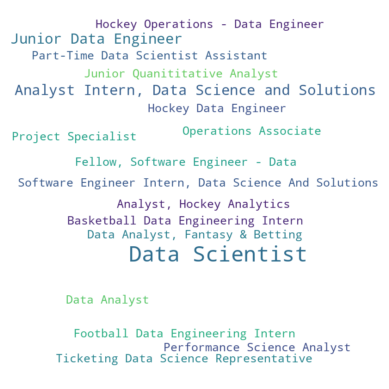

In [555]:
# Create a dictionary of terms and frequencies
job_freq_dict = dict(zip(job_freq['title'], job_freq['freq']))

# Generate the word cloud
wordcloud_job_titles = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(job_freq_dict)

# Display the word cloud
plt.imshow(wordcloud_job_titles, interpolation='bilinear')
plt.axis('off')
plt.show()

## Task 2 - Words after DATA

Clearly "DATA" an important word so what words come after data?

1.	Create a bi-gram of Job Description terms starting with the word "Data", group by bigram and count them up into a `bigram_term_frequency` table. A good reference is the bigram example [here](https://colab.research.google.com/drive/1DdK_2Pn-LRSNnUhfuyBLEZlWvoFbffM_?usp=sharing).

In [556]:
#From 4.7 Bigram Preferred Way
ngram_size = 2

# Extract bi-grams from the "job_description" column
bigram_df = (df_jobs['job_description']
             .str.lower()
             .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .str.split()
             .apply(lambda x: list(ngrams(x, ngram_size))) # Extract bi-grams
             .explode()
             .reset_index(drop=True)
             .to_frame('bigram')
          )


# Count the bigrams
bigram_freq = (bigram_df.groupby("bigram")
                     .agg(freq=("bigram", "count"))
                     .reset_index()
                     .sort_values("freq", ascending=False)
                     #.rename(columns={"big": "term"})
                     .dropna()
                     .reset_index(drop=True)
            )
# eyeball them
bigram_freq.head(10)

,bigram,freq
0,"(ability, to)",21
1,"(of, the)",21
2,"(experience, with)",18
3,"(in, the)",17
4,"(will, be)",14
5,"(such, as)",12
6,"(experience, in)",11
7,"(computer, science)",11
8,"(machine, learning)",10
9,"(with, a)",9


In [557]:
# From 4.7 Bigram Preferred Way
# remove any nulls
bigram_freq = bigram_freq.dropna()
# create a new column with stop words removed
bigram_freq['bigram_wo_stopwords'] = bigram_freq['bigram'].apply(lambda x: ' '.join([word for word in x if pd.notna(word) and word.lower() not in stop_words]))
# select only bigrams that contain two words
bigram_freq = bigram_freq[bigram_freq['bigram_wo_stopwords'].str.split().str.len() == 2].reset_index(drop=True)
bigram_freq.head(10)

,bigram,freq,bigram_wo_stopwords
0,"(computer, science)",11,computer science
1,"(machine, learning)",10,machine learning
2,"(front, office)",9,front office
3,"(data, science)",8,data science
4,"(·, experience)",7,· experience
5,"(data, engineering)",6,data engineering
6,"(related, field)",6,related field
7,"(experience, working)",6,experience working
8,"(analytics, team)",5,analytics team
9,"(hockey, analytics)",5,hockey analytics


In [558]:
start_data_filter= bigram_freq['bigram_wo_stopwords'].str.startswith('data')
start_data_filter

0       False
1       False
2       False
3        True
4       False
        ...  
1569    False
1570    False
1571    False
1572    False
1573    False
Name: bigram_wo_stopwords, Length: 1574, dtype: bool

In [559]:
start_data = bigram_freq[start_data_filter]
start_data

,bigram,freq,bigram_wo_stopwords
3,"(data, science)",8,data science
5,"(data, engineering)",6,data engineering
14,"(data, pipelines)",4,data pipelines
20,"(data, collection)",4,data collection
22,"(data, infrastructure)",3,data infrastructure
29,"(data, sources)",3,data sources
71,"(data, visualization)",2,data visualization
77,"(data, analysis)",2,data analysis
78,"(data, analyst)",2,data analyst
86,"(data, sets)",2,data sets


2. Create a word cloud of data + term combinations, by filter the bigram_term_frequency for bigrams starting with “data”

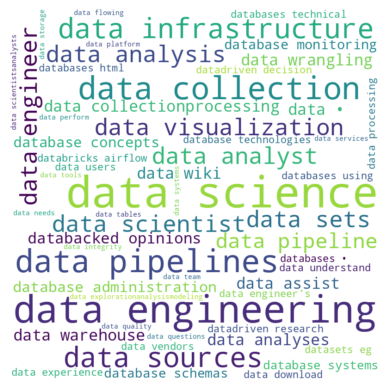

In [560]:
# Create a dictionary of terms and frequencies
start_data_dict = dict(zip(start_data['bigram_wo_stopwords'], start_data['freq']))

# Generate the word cloud
wordcloud_start_data = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(start_data_dict)

# Display the word cloud
plt.imshow(wordcloud_start_data, interpolation='bilinear')
plt.axis('off')
plt.show()

3. Create a bar chart of the top 10, data + term combinations.


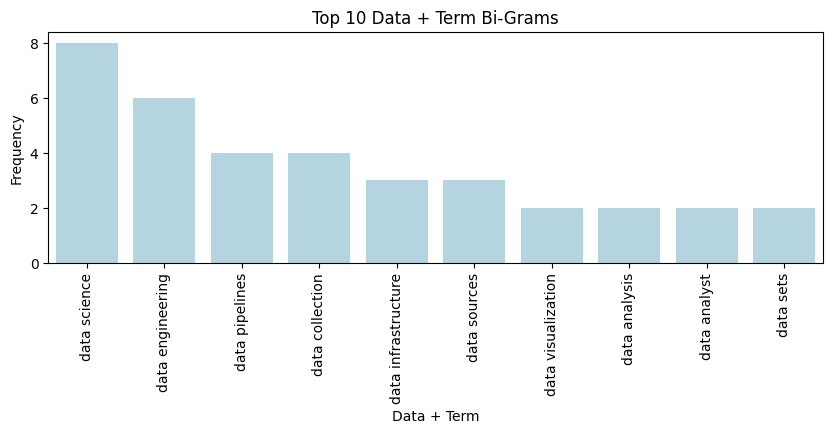

In [561]:
plt.figure(figsize=(10, 3))
sns.barplot(x="bigram_wo_stopwords", y="freq", data=start_data.head(10), color="lightblue")
plt.title('Top 10 Data + Term Bi-Grams')
plt.xlabel('Data + Term')
plt.xticks(rotation=90)
plt.ylabel('Frequency');

## Task 3 - Analyze Technology

Here is a list of important technology terms - you of course should add more.
- creat 2 lists as shown below
- add any additional technology term or bigram that you think are useful.

```python
technology_words = [
    "analytics",
    "data",
    "analyze",
    "r",
    "python",
    "sql",
    "excel",
    "cloud",
    "aws",
    "azure",
    "ec2",
    "sas",
    "spss",
    "saas",
    "spark",
    "tensorflow",
    "sagemaker",
    "tableau",
    "hadoop",
    "pyspark",
    "h2o.ai",
    "spark",
    "ai",
    "shiny",
    "dash",
    "pca",
    "k-means",
    "emr",
    "mapreduce",
    "nosql",
    "hive",
    "presentation",
    "nltk",
    "scikit",
    "javascript",
    "etl"]


technology_bigrams = [
  "business intelligence",
  "text mining",
  "logistic regression",
  "amazon web",
  "big data",
  "business analytics",
  "google cloud",
  "microsoft azure",
  "machine learning",
  "data science",
  "deep learning",
  "neural network",
  "neural networks",
  "neural nets",
  "random forests",
  "random forest",
  "elastic search",
  "map reduce",
  "artificial intelligence"]
```

1. Filter the `term_frequency` table you made in task 1 based on the `technology_words` provided, resulting a new table `tech_term_freq`

2. Filter the `bigram_frequency` table you made in task 2 based on `technology_bigrams` provided, resulting a new table `tech_bigram_freq`

3. Smash the 2 tables together vertically as new table `technology_term_frequency` using `pd.concate()`
> Hint: only include 2 columns, "terms" and "freq"

4. Make a Bar Chart of top 10 Technolgy Terms.

5. Make a Wordcloud of all Techology Terms.

In [562]:
#Create Lists
technology_words = [
    "analytics",
    "data",
    "analyze",
    "r",
    "python",
    "sql",
    "excel",
    "cloud",
    "aws",
    "azure",
    "ec2",
    "sas",
    "spss",
    "saas",
    "spark",
    "tensorflow",
    "sagemaker",
    "tableau",
    "hadoop",
    "pyspark",
    "h2o.ai",
    "spark",
    "ai",
    "shiny",
    "dash",
    "pca",
    "k-means",
    "emr",
    "mapreduce",
    "nosql",
    "hive",
    "presentation",
    "nltk",
    "scikit",
    "javascript",
    "etl"]

technology_bigrams = [
  "business intelligence",
  "text mining",
  "logistic regression",
  "amazon web",
  "big data",
  "business analytics",
  "google cloud",
  "microsoft azure",
  "machine learning",
  "data science",
  "deep learning",
  "neural network",
  "neural networks",
  "neural nets",
  "random forests",
  "random forest",
  "elastic search",
  "map reduce",
  "artificial intelligence"]

In [563]:
#Filter the term_frequency table you made in task 1 based on the technology_words provided, resulting a new table tech_term_freq
tech_words_filter= term_freq_wo_junk['term'].isin(technology_words)
tech_words_filter

5        True
9       False
14      False
15      False
18      False
        ...  
1223    False
1224    False
1225    False
1227    False
1228    False
Name: term, Length: 1158, dtype: bool

In [564]:
tech_term_freq= term_freq_wo_junk[tech_words_filter]
tech_term_freq

,term,freq
5,data,96
20,analytics,22
29,sql,17
51,python,13
75,r,10
124,etl,6
229,presentation,4
312,cloud,3
370,analyze,2
402,aws,2


In [565]:
tech_bigram_filter = bigram_freq['bigram_wo_stopwords'].isin(technology_bigrams)
tech_bigram_filter

0       False
1        True
2       False
3        True
4       False
        ...  
1569    False
1570    False
1571    False
1572    False
1573    False
Name: bigram_wo_stopwords, Length: 1574, dtype: bool

In [566]:
tech_bigram_freq = bigram_freq[tech_bigram_filter]
tech_bigram_freq

,bigram,freq,bigram_wo_stopwords
1,"(machine, learning)",10,machine learning
3,"(data, science)",8,data science
46,"(business, analytics)",3,business analytics


In [567]:
tech_bigram_freq['term']= tech_bigram_freq['bigram_wo_stopwords']
tech_bigram_freq

,bigram,freq,bigram_wo_stopwords,term
1,"(machine, learning)",10,machine learning,machine learning
3,"(data, science)",8,data science,data science
46,"(business, analytics)",3,business analytics,business analytics


In [568]:
#Smash the 2 tables together vertically as new table technology_term_frequency using pd.concate()
#Hint: only include 2 columns, "terms" and "freq"
#Adapted from Midterm Notebook

tech_term_frequency= pd.concat([tech_term_freq[['term','freq']],tech_bigram_freq[['term','freq']]],axis=0)
tech_term_frequency

,term,freq
5,data,96
20,analytics,22
29,sql,17
51,python,13
75,r,10
124,etl,6
229,presentation,4
312,cloud,3
370,analyze,2
402,aws,2


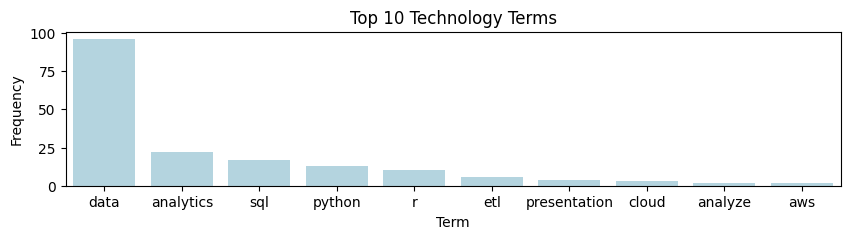

In [569]:
#Make a Bar Chart of top 10 Technolgy Terms.
plt.figure(figsize=(10, 2))
sns.barplot(x="term", y="freq", data=tech_term_frequency.head(10), color="lightblue")
plt.title('Top 10 Technology Terms')
plt.xlabel('Term')
plt.ylabel('Frequency');

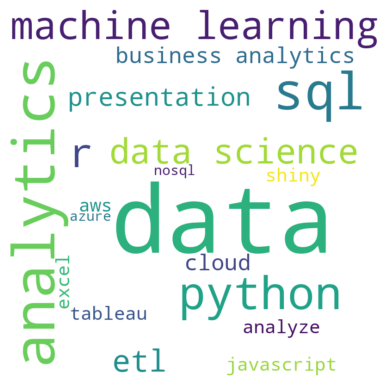

In [570]:
#Make a Wordcloud of all Techology Terms.
# Create a dictionary of terms and frequencies
tech_term_frequency_dict = dict(zip(tech_term_frequency['term'], tech_term_frequency['freq']))

# Generate the word cloud
wordcloud_tech_terms = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(tech_term_frequency_dict)

# Display the word cloud
plt.imshow(wordcloud_tech_terms, interpolation='bilinear')
plt.axis('off')
plt.show()

## Task 4 - Your Resume

1. Save/print your resume as PDF, it needs to be PDF format for this to work.

2. Install pdfminer and import the function extract_text()

3. Use PdfReader to read your resume into a table. For example:

```python
!pip install pdfminer.six
from pdfminer.high_level import extract_text

def extract_text_from_pdf(file_path):
    return extract_text(file_path)

text = extract_text_from_pdf('your_file.pdf')
print(text)

# Split text by rows and store them as a data frame
cv_df = pd.DataFrame({'cv_text': text.split('\n')})

```

4. Parse your resume, filter out the common words, digits, and any excludes

5. Create a word cloud of the remaining words in your resume

6. Filter for technology_words and technology_bigrams smash the results together (just like in task 3). To do this, you will need to
  - create Words Freq and Bigram Freq based on your resume
  - then filter for technology_words and technology_bigrams

7. Make a bar chart of top 10 combined technolgy term frequencies
8. Make a wordcloud of all combined technolgy term frequencies

In [571]:
!pip install pdfminer.six
from pdfminer.high_level import extract_text

In [572]:
#Adapted from 5.1 PDFMiner
def extract_text_from_pdf(file_path):
    return extract_text(file_path)

text = extract_text_from_pdf('/content/drive/MyDrive/Colab Notebooks/Projects/Project 5/NikBaldisResumePython.pdf')
print(text)

NIKLAS BALDIS 
Leader | Teammate | Analyst 
Pittsburgh, PA | baldnj23@wfu.edu | 724.814.6769 | linkedin.com/in/niklasbaldis 

EDUCATION 
Wake Forest University School of Business 
Master of Science in Business Analytics 
Relevant Coursework: Analytics Software Technology (Python), Probability and Statistical Modeling (Excel) 

Winston-Salem, NC 
May 2024 

Baldwin Wallace University School of Business 
Bachelor of Arts in Business Administration, Marketing | GPA: 3.64 
Relevant Coursework: Adv. Appl. for Info Analysis (Excel), Basic Stat. Methods (Excel), Business Analytics (Excel), 
Management Strategy & Policy (Capstone Course) 
Honors: Dean’s List, Chi Alpha Sigma Honor Society 
Student-Athlete: Division III Varsity Baseball Pitcher 

Berea, OH 
May 2023 

RELEVANT SKILLS 
Microsoft Office Suite:  Word (Advanced), Excel (Advanced), PowerPoint (Advanced), Outlook 
Technical Skills: Python, Zoom | Certifications: Google Analytics Certification 
Power Skills: Analysis, Strategy, Organi

In [600]:
# Split text by rows and store them as a data frame
cv_df = pd.DataFrame({'cv_text': text.split('\n')})
cv_df

,cv_text
0,NIKLAS BALDIS
1,Leader | Teammate | Analyst
2,"Pittsburgh, PA | baldnj23@wfu.edu | 724.814.67..."
3,
4,EDUCATION
...,...
69,
70,
71,
72,


In [574]:
#Parse your resume
cv_df = (cv_df['cv_text']
             .str.lower()
             .str.strip() # remove leading and trailing spaces
             .str.normalize('NFKD') # string encodings
             .str.split() # make a list of text
             .explode() # create rows of words
             .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .reset_index(drop=True)
             .to_frame('term')
          )
#cv_df

In [575]:
#filter out the common words, digits, and any excludes
cv_w_junk = (cv_df
            .groupby("term")
            .size()
            .reset_index()
            .rename(columns={0: "freq"})
            .sort_values("freq", ascending=False)
            .dropna()
            .reset_index(drop=True)
            )
cv_w_junk

,term,freq
0,and,11
1,,8
2,the,7
3,to,6
4,skills,6
...,...,...
223,gpa,1
224,head,1
225,honor,1
226,honors,1


In [576]:
junk = exclude_words + stop_words
cv_is_junk = cv_w_junk['term'].isin(junk)

cv_wo_junk= cv_w_junk[~cv_is_junk]
cv_wo_junk

,term,freq
4,skills,6
8,excel,5
9,business,5
11,analytics,4
12,baseball,4
...,...,...
223,gpa,1
224,head,1
225,honor,1
226,honors,1


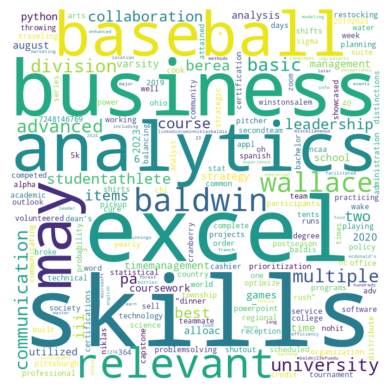

In [577]:
#Create a word cloud of the remaining words in your resume
# Create a dictionary of terms and frequencies
cv_wo_junk_dict = dict(zip(cv_wo_junk['term'], cv_wo_junk['freq']))

# Generate the word cloud
wordcloud_cv = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(cv_wo_junk_dict)

# Display the word cloud
plt.imshow(wordcloud_cv, interpolation='bilinear')
plt.axis('off')
plt.show()

In [578]:
#Filter for technology_words and technology_bigrams smash the results together (just like in task 3). To do this, you will need to
#Words Freq
tech_words_filter_cv= cv_wo_junk['term'].isin(technology_words)
tech_words_filter_cv

4      False
8       True
9      False
11      True
12     False
       ...  
223    False
224    False
225    False
226    False
227    False
Name: term, Length: 207, dtype: bool

In [579]:
tech_term_freq_cv= cv_wo_junk[tech_words_filter_cv]
tech_term_freq_cv

,term,freq
8,excel,5
11,analytics,4
41,python,2


In [583]:
cv_df.columns

Index(['term'], dtype='object')

In [601]:
#Bigram Freq based on your resume
ngram_size = 2

# Extract bi-grams from the "term" column
bigram_df_cv = (cv_df['cv_text'] #Had to re-run original cv_df to get back 'cv_text' column
             .str.lower()
             .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .str.split()
             .apply(lambda x: list(ngrams(x, ngram_size))) # Extract bi-grams
             .explode()
             .reset_index(drop=True)
             .to_frame('bigram')
          )


# Count the bigrams
bigram_freq_cv = (bigram_df_cv.groupby("bigram")
                     .agg(freq=("bigram", "count"))
                     .reset_index()
                     .sort_values("freq", ascending=False)
                     #.rename(columns={"big": "term"})
                     .dropna()
                     .reset_index(drop=True)
            )
# eyeball them
bigram_freq_cv.head(10)

,bigram,freq
0,"(baldwin, wallace)",3
1,"(wallace, university)",2
2,"(in, business)",2
3,"(of, business)",2
4,"(varsity, baseball)",2
5,"(skills, utilized)",2
6,"(division, iii)",2
7,"(relevant, coursework)",2
8,"(may, 2023)",2
9,"(business, analytics)",2


In [587]:
tech_bigram_filter_cv = bigram_freq_cv['bigram'].isin(technology_bigrams)
tech_bigram_filter_cv

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: bigram, Length: 277, dtype: bool

In [588]:
tech_bigram_freq_cv= bigram_freq_cv[tech_bigram_filter_cv]
tech_bigram_freq_cv

,bigram,freq


In [589]:
tech_bigram_freq_cv['term'] = tech_bigram_freq_cv['bigram'].apply(lambda x: ' '.join([word for word in x if pd.notna(word) and word.lower() not in stop_words]))
# select only bigrams that contain two words
tech_bigram_freq_cv = tech_bigram_freq_cv[tech_bigram_freq_cv['term'].str.split().str.len() == 2].reset_index(drop=True)
tech_bigram_freq_cv.head(10)

,bigram,freq,term


In [590]:
#Smash results together
tech_term_frequency_cv= pd.concat([tech_term_freq_cv[['term','freq']],tech_bigram_freq_cv[['term','freq']]],axis=0)
tech_term_frequency_cv

,term,freq
8,excel,5
11,analytics,4
41,python,2


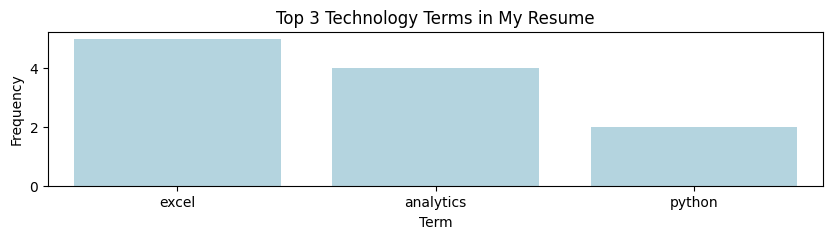

In [591]:
#Make a bar chart of top 10 combined technolgy term frequencies
plt.figure(figsize=(10, 2))
sns.barplot(x="term", y="freq", data=tech_term_freq_cv.head(10), color="lightblue")
plt.title('Top 3 Technology Terms in My Resume')
plt.xlabel('Term')
plt.ylabel('Frequency');

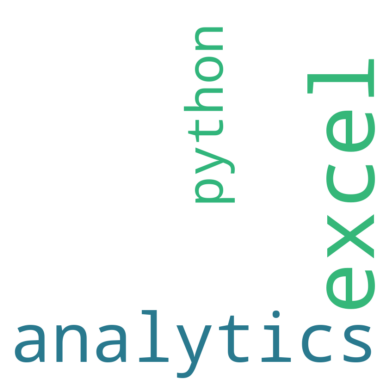

In [592]:
#Make a wordcloud of all combined technolgy term frequencies
# Create a dictionary of terms and frequencies
tech_term_frequency_cv_dict = dict(zip(tech_term_frequency_cv['term'], tech_term_frequency_cv['freq']))

# Generate the word cloud
wordcloud_tech_term_freq_cv = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(tech_term_frequency_cv_dict)

# Display the word cloud
plt.imshow(wordcloud_tech_term_freq_cv, interpolation='bilinear')
plt.axis('off')
plt.show()

## Task 5 - Compare Resume vs Jobs

1. What terms do your resume and jobs data have in common? That is, compare your resume’s terms to the terms found in the job descriptions. Find the top 10 terms in common.
> Hint: `pd.merge(how='inner')` or how ever you want to do it.

2. Based on the job's terms, what terms are missing from your resume? Make a table of top 10 terms missing from your resume but found in your job descriptions.
> Hint: `pd.merge(how='left')` or how ever you want to do it.

3. What tech-skills does your resume and jobs have in common? Find the top 5 technology terms.
> Hint: `pd.merge(how='inner')` or filter `.isin()`


4. Based on the job's tech-skills, what are top 5 skills are missing from your resume?
> Hint: `pd.merge(how='left')` or filter not in

In [593]:
#What terms do your resume and jobs data have in common? That is, compare your resume’s terms to the terms found in the job descriptions.
#Find the top 10 terms in common.
#Hint: pd.merge(how='inner') or how ever you want to do it.
cv_job_dat_merge = pd.merge(term_freq_wo_junk,cv_wo_junk,how='inner')
cv_job_dat_merge.head(10)

,term,freq
0,may,4
1,advanced,3
2,basic,3
3,collaboration,2
4,playing,1
5,probability,1
6,powerpoint,1
7,word,1
8,world,1
9,spanish,1


In [603]:
#Based on the job's terms, what terms are missing from your resume?
#Make a table of top 10 terms missing from your resume but found in your job descriptions.
#Hint: pd.merge(how='left') or how ever you want to do it.
cv_missing_filter = term_freq_wo_junk['term'].isin(cv_wo_junk_dict)
cv_missing_filter

5       False
9        True
14      False
15       True
18       True
        ...  
1223    False
1224    False
1225    False
1227    False
1228    False
Name: term, Length: 1158, dtype: bool

In [615]:
cv_missing= tech_term_freq[~cv_missing_filter]
cv_missing.head(10)

,term,freq
5,data,96
29,sql,17
75,r,10
124,etl,6
229,presentation,4
312,cloud,3
370,analyze,2
402,aws,2
409,javascript,2
482,tableau,2


In [619]:
tech_term_frequency

,term,freq
5,data,96
20,analytics,22
29,sql,17
51,python,13
75,r,10
124,etl,6
229,presentation,4
312,cloud,3
370,analyze,2
402,aws,2


In [621]:
tech_term_frequency_cv

,term,freq
8,excel,5
11,analytics,4
41,python,2


In [625]:
#What tech-skills does your resume and jobs have in common? Find the top 5 technology terms.
#Hint: pd.merge(how='inner') or filter .isin()
cv_job_skills_merge = pd.merge(tech_term_frequency,tech_term_frequency_cv,how='right')
cv_job_skills_merge.head(5)

,term,freq
0,excel,5
1,analytics,4
2,python,2


In [612]:
#Based on the job's tech-skills, what are top 5 skills are missing from your resume?
#Hint: pd.merge(how='left') or filter not in
cv_missing_skills_filter = ~tech_term_freq['term'].isin(tech_term_frequency_cv_dict)
cv_missing_skills_filter

5        True
20      False
29       True
51      False
75       True
124      True
229      True
312      True
370      True
402      True
409      True
482      True
515      True
518     False
988      True
1089     True
Name: term, dtype: bool

In [616]:
cv_missing_skills= term_freq_wo_junk[~cv_missing_filter]
cv_missing_skills.head(10)

,term,freq
5,data,96
14,work,31
21,ability,22
26,hockey,18
27,new,17
29,sql,17
30,qualifications,16
31,strong,16
32,development,15
33,develop,15


In [626]:
#%%shell
#jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Projects/Project 5/job_descriptions_and_resume_Nik_Baldis.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Projects/Project 5/job_descriptions_and_resume_Nik_Baldis.ipynb to html
[NbConvertApp] Writing 2279787 bytes to /content/drive/MyDrive/Colab Notebooks/Projects/Project 5/job_descriptions_and_resume_Nik_Baldis.html


## Finally
Convert this to **HTML** and do you writeup in a **Word document**.